In [1]:
import collections
from collections import OrderedDict
from matplotlib import pyplot as plt
from matplotlib import cm
import pylab
import math

In [6]:
class CGR_SeqAlignment:
    def count_kmers(self,sequence, k):
        d = collections.defaultdict(int)
        for i in range(len(data)-(k-1)):
            d[sequence[i:i+k]] +=1
        for key in list(d):
            if "N" in key:
                del d[key]
        return d
    def probabilities(self,kmer_count, k):
        probabilities = collections.defaultdict(float)
        N = len(data)
        for key, value in kmer_count.items():
            probabilities[key] = float(value) / (N - k + 1)
        return probabilities

    def chaos_game_representation(self,probabilities, k):
        array_size = int(math.sqrt(4**k))
        chaos = []
        for i in range(array_size):
            chaos.append([0]*array_size)

        maxx = array_size
        maxy = array_size
        posx = 4
        posy = 4
        for key, value in probabilities.items():
            for char in key:
                if char == "T":
                    posx += maxx // 2
                elif char == "C":
                    posy += maxy // 2
                elif char == "G":
                    posx += maxx // 2
                    posy += maxy // 2
                maxx = maxx // 2
                maxy = maxy//2
             #   print(char," posx ",posx," posy ",posy)
            chaos[posy-4][posx-4] = value
            maxx = array_size
            maxy = array_size
            posx = 4
            posy = 4

        return chaos

In [7]:
f = open("NC_012920.fasta")
s1 = f.read()
data = "".join(s1.split("\n")[0:])

In [8]:
k1 = 3
k2 = 4
cgr = CGR_SeqAlignment()
f3 = cgr.count_kmers(data,k1)
f4 = cgr.count_kmers(data,k2)

In [9]:
f3_prob = cgr.probabilities(f3, k1)
f4_prob  = cgr.probabilities(f4, k2)

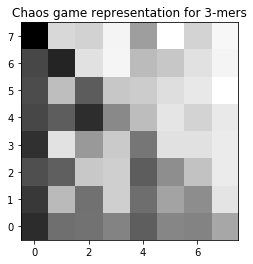

In [11]:
chaos_k3 = cgr.chaos_game_representation(f3_prob, k1)
pylab.title('Chaos game representation for 3-mers')
pylab.imshow(chaos_k3, interpolation='nearest', cmap=cm.gray_r)
plt.gca().invert_yaxis()
pylab.show()

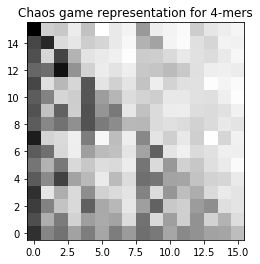

In [13]:
chaos_k4 = cgr.chaos_game_representation(f4_prob, k2)
pylab.title('Chaos game representation for 4-mers')
pylab.imshow(chaos_k4, interpolation='nearest', cmap=cm.gray_r)
plt.gca().invert_yaxis()
pylab.show()